# 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#train_link = "https://bit.ly/38Lia2e"
#test_link = "https://bit.ly/3h5eqNL"
#train1 = pd.read_csv(train_link)
#test1 = pd.read_csv(test_link)

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train1 = pd.read_csv('data/train.csv')
test1 = pd.read_csv('data/test.csv')

# 전처리


## 전처리 시작

### 필요한 함수 정의

In [4]:
def null_count(dataset):
    '''
    해당 데이터셋에 결측치가 있는 feature와 개수 출력
    '''
    return dataset.isnull().sum()[dataset.isnull().sum()!=0]
    
def null_check(feature):
    '''
    해당 feature의 결측치가 각 데이터셋에 얼마나 있는지 확인.
    dataset도 input으로 받아야 할지 고민.
    '''
    print('--', feature, '--')
    print('train :', train[feature].isnull().sum())
    print('test :', test[feature].isnull().sum())

def val_list(dataset, feature):
    '''
    해당 dataset의 feature가 가진 value들 중복 없이 리스트로 출력
    '''
    return list(set(dataset[feature].values.tolist()))

#val_list = set(train['MSZoning'].values.tolist()) - 중복 없이 value종류 추출 
# 근데 이건 순서가 내 맘대로 안됨

def val_count(feature):
    '''
    train, test 데이터의 value_count를 같이 출력
    input에 데이터셋도 받는게 좋을지..?
    '''
    print('-----', feature, '-----')
    print('---- train ----')
    print(train[feature].value_counts())
    print('---- test ----')
    print(test[feature].value_counts(),'\n')

def map_order(dataset, feature, val_list):
    '''
    Value들을 0부터 순서대로 매핑
    데이터셋(train/test), feature명, 원하는 순서대로 value_list 입력
    '''
    mapping = dict(zip(val_list, range(len(val_list))))
    return dataset[feature].map(mapping) #원하는 순서대로 0부터 매핑된 컬럼 출력


def val_cat(dataset, feature):
    '''
    dataset, feature를 입력받아서 해당 feature에 대해 categorize
    '''
    val_list = set(dataset[feature].values.tolist())
    for feat in val_list:
        dataset[feat] = (dataset[feature]==feat).astype(int)
    dataset = dataset.drop(feature, axis = 1)
    
def avg_price(feature):
    '''
    train set 내의 해당 feature의 value들에 따른 가격의 평균
    '''
    for feat in set(train[feature].values.tolist()):
        mean_price = train['SalePrice'][train[feature] == feat].mean()
        print(feat, ':', mean_price)
        
def price_plot(feature):
    '''
    train set 내의 해당 feature의 value에 따른 가격의 평균 plot 그래프로 출력
    '''
    train.groupby(feature).mean()['SalePrice'].plot()
    
def brief():
    '''
    feature의 분류를 브리핑
    '''
    print('그대로 넣을 거 {}개: \n'.format(len(feature_raw)),feature_raw,'\n')
    print('모아놓고 그대로 넣을지? one-hot을 할지 등 {}개: \n'.format(len(feature_dis)),feature_dis,'\n')
    print('매핑 할 데이터 {}개: \n'.format(len(feature_map)),feature_map,'\n')
    print('one-hot encoding 시킬 것 {}개: \n'.format(len(feature_onehot)),feature_onehot,'\n')
    print('따로 봐야 할 것 {}개: \n'.format(len(feature_extra)),feature_extra,'\n')
    print('삭제할 것 {}개: \n'.format(len(feature_del)),feature_del,'\n')
    
def price_cor(feature):
    '''
    feature와 집값 사이의 상관계수를 프린트하고 반환
    '''
    print(round(float(pd.DataFrame(train.corr()['SalePrice']).loc[feature]),3))
    return round(float(pd.DataFrame(train.corr()['SalePrice']).loc[feature]),3)

def onehot(df, columns_list):
    '''
    columns_list에 있는 df의 column에 대하여 onehot인코딩하여 df을 반환
    '''
    import pandas as pd
    len_list=len(columns_list)
    for i in range(len_list):
        len_cat=len(df.groupby(columns_list[i]))
        catrzed=pd.get_dummies(df[columns_list[i]])
        cat_list=[]
        for j in range(len_cat):
            cat_list.append(df.groupby(columns_list[i]).count().index[j])
        df[cat_list]=catrzed
        df=df.drop([columns_list[i]], axis=1)
    return df

### feature 분류

- feature들을 하나씩 보면서 5가지 분류로 나눌 계획.  
- 각 분류별로 리스트에 feature이름 저장.  
  
  
- <span class="mark">feature_raw</span> : 그대로 넣을거   
     - 넓이, 길이 등 연속적인 숫자 데이터
- <span class="mark">feature_dis</span> : 모아놓고 그대로 넣을지? one-hot을 할지 등
     - 개수, 유무(0/1) 등 discrete 한 숫자 데이터
- <span class="mark">feature_map</span> : 매핑 할 데이터   
    - 경사도고 낮음 -> 높음 처럼 문자이지만 순서가 있어보이는 경우 숫자로 매핑
- <span class="mark">feature_onehot</span> : one-hot encoding 시킬 것
    - 각각의 특성이 독립?이라서 컬럼을 새로 만들어 주는게 좋아 보이는 경우
- <span class="mark">feature_extra</span> : 따로 봐야 할 것  
    - 그래프를 그려본다거나, 가격과의 관계를 직접 보고 판단
- <span class="mark">feature_del</span> : 삭제
    - 필요 없다고 판단되어 삭제 할 데이터
    

In [5]:
feature_raw = []
feature_dis = []
feature_map = []
feature_onehot = []
feature_extra = []
feature_del = []

In [6]:
brief()

그대로 넣을 거 0개: 
 [] 

모아놓고 그대로 넣을지? one-hot을 할지 등 0개: 
 [] 

매핑 할 데이터 0개: 
 [] 

one-hot encoding 시킬 것 0개: 
 [] 

따로 봐야 할 것 0개: 
 [] 

삭제할 것 0개: 
 [] 



## Feature들 살펴보기

### ID

#### 의견

그냥 아이디임.
삭제해도 될 듯.
- 동의

#### 데이터 확인

In [7]:
train['Id'].head()

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

#### 분류

In [8]:
feature_del.append('Id')

### MSSubClass

- The building class  
- 빌딩의 클래스?  

#### 의견
- discrete한 값임
- 숫자가 크다고 좋은게 아니라서. 다른 방법이 필요함.

#### 데이터 확인
- 숫자가 크다고 무조건 좋지 않음 (ex 180)
- 그래프 그려볼것

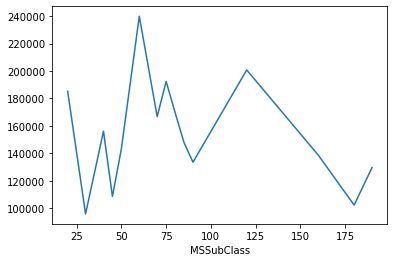

In [9]:
price_plot('MSSubClass')

#### 결측치 확인
- 결측치 없음

#### 분류
- discrete한 값이니까 feature_dis 리스트에 추가

In [10]:
feature_dis.append('MSSubClass')

### MSZoning

- The general zoning classification  
- 주거구역 / 상업구역 등 집이 위치한 구역?을 나타냄.

#### 의견

- C, FV 생각하면 one-hot encoding 하고 싶음.
- 근데 RL, RM, RH간에는 순서?가 있어 보여서..  
- 일단 매핑 해보자 1~5

- 집값 평균 그래프 그려보니 5번이 젤 높고 4번이 젤 낮다
- 순서 조정 필요할듯, 또는 원핫이코딩이 나을 수도.

#### 데이터 확인
- RL -> RM -> RH 순으로 인구 밀집도가 높음.(얘네가 데이터의 대부분임)  
- 나머지 FV(물에 떠있는 집;;), C(상업지구)는 어떻게 처리할지..  

In [11]:
val_count('MSZoning')

----- MSZoning -----
---- train ----
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
---- test ----
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64 



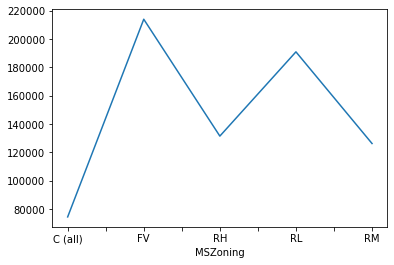

In [12]:
price_plot('MSZoning')

#### 결측치 확인
- test셋에 결측치 4개.
- 데이터를 보면 RL이 압도적으로 많으니까.. RL로 결측 채워보자

In [13]:
null_check('MSZoning')

-- MSZoning --
train : 0
test : 4


In [14]:
test['MSZoning'].fillna('RL', inplace=True)
null_check('MSZoning')

-- MSZoning --
train : 0
test : 0


#### 매핑
- C, FV 생각하면 <span class="mark">카테고라이즈</span> 하고 싶은데 근데 RL, RM, RH간에는 순서?가 있어 보여서..  
->일단 RL -> RM -> RH -> C -> FV 순으로 숫자로 매핑해보기로(0~4)

In [15]:
# RL -> RM -> RH -> C -> FV 
map_MSZoning = {'RL':1, 'RM':2, 'RH':3, 'C (all)':4, 'FV':5}
train['MSZoning'] = train['MSZoning'].map(map_MSZoning)
test['MSZoning'] = test['MSZoning'].map(map_MSZoning)

In [16]:
val_count('MSZoning')

----- MSZoning -----
---- train ----
1    1151
2     218
5      65
3      16
4      10
Name: MSZoning, dtype: int64
---- test ----
1    1118
2     242
5      74
4      15
3      10
Name: MSZoning, dtype: int64 



#### 분류
- 일단 순서를 줘서 매핑을 했으니까 feature_order 리스트에 'MSZoning' 넣기

In [17]:
feature_map.append('MSZoning')

### LotFrontage / LotArea

- LotFrontage : Linear feet of street connected to property
- LotArea : Lot size in square feet

#### 의견

- 둘 다 길이, 넓이로 숫자 데이터라서 그냥 넣을 것.
- <span class="mark">값이 큰데 어떻게 normalize할지?</span>
- <span class="mark">길이가 길면, 면적도 넓어질텐데 둘을 하나로 합칠 수 있나?</span>

#### 데이터 확인

In [18]:
val_count('LotFrontage')

----- LotFrontage -----
---- train ----
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64
---- test ----
60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
149.0      1
117.0      1
121.0      1
101.0      1
22.0       1
Name: LotFrontage, Length: 115, dtype: int64 



In [19]:
val_count('LotArea')

----- LotArea -----
---- train ----
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
---- test ----
9600     20
7200     18
6000     17
9000     15
7500     12
         ..
10990     1
8088      1
13041     1
6900      1
12285     1
Name: LotArea, Length: 1106, dtype: int64 



<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

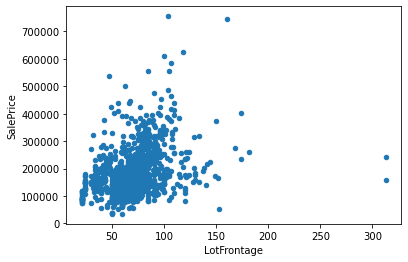

In [20]:
train.plot(x='LotFrontage',y='SalePrice',kind='scatter')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

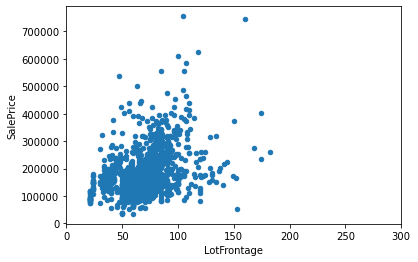

In [21]:
train.plot(x='LotFrontage',y='SalePrice',kind='scatter',xlim=(0,300))

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

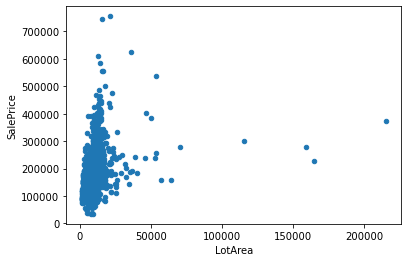

In [22]:
train.plot(x='LotArea',y='SalePrice',kind='scatter')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

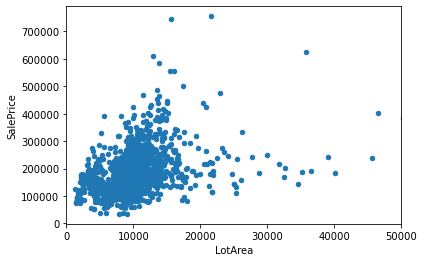

In [23]:
train.plot(x='LotArea',y='SalePrice',kind='scatter', xlim=(0,50000))

#### 결측치 확인
- LotFrontage에 결측치가 꽤 많음
- 넓이에 따라서 (넓으면 길이도 길게) 넣어주면 좋을거같음

- LotFrontage의 산점도를 보면 이상값이 있음
- 이상값을 제외하고 그래프를 그려보기 위해 x값 범위 설정했더니 양의 상관관계가 있는 듯 하지만 강하지 않음.
- LotFrontage와 LotArea의 산점도 분포가 매우 유사하다.
- 이상값을 어떻게 처리해야 하나?

In [24]:
null_check('LotFrontage'), null_check('LotArea')

-- LotFrontage --
train : 259
test : 227
-- LotArea --
train : 0
test : 0


(None, None)

- 길이 / 넓이 의 비율을 평균내서, 이 비율을 넓이에 곱해줘서 결측치를 채워줄거임.
- 다행히도 넓이는 결측이 없어서 ㅎㅎ (다행히?다행이?)

In [25]:
#Lot_ratio : train/test 데이터의 비율을 다 구해서 평균
Lot_ratio = ((train['LotFrontage']/train['LotArea']).mean() + (test['LotFrontage']/test['LotArea']).mean())/2
train['LotFrontage'].fillna(train['LotArea']*Lot_ratio, inplace=True)
test['LotFrontage'].fillna(test['LotArea']*Lot_ratio, inplace=True) 

In [26]:
null_check('LotFrontage')

-- LotFrontage --
train : 0
test : 0


#### 분류
- 숫자(길이, 넓이) 데이터니까 일단 그냥 넣기
- Normalize에 대한 고민.

In [27]:
feature_raw.append('LotFrontage')
feature_raw.append('LotArea')

### Street / Alley

- 거리, 골목의 유형?

#### 의견

- Street는 Gravl, Pave를 categorize
- Alley는 NA 까지 3개로 categorize?
- <span class="mark">그냥 0/1/2를 쓰면 안되는지?</span>

- Street는 Gravel 6개밖에 안되서 무의미한 feature 아닌가?
- Alley는 pave가 Gravel보다 좋아 보이긴 하다. 그러나 전체 데이터의 90%이상을 차지하는 NA가 Gravel보다 좋은 것 같인 한데 pave와는 우열을 가릴 수 없다.
- 그냥 NA가 중간이라 치고 0,1,2 넣는 게 나으려나

#### 데이터 확인
- Gravel / Pave / NA(골목이 없음)

In [28]:
val_count('Street'), val_count('Alley')

----- Street -----
---- train ----
Pave    1454
Grvl       6
Name: Street, dtype: int64
---- test ----
Pave    1453
Grvl       6
Name: Street, dtype: int64 

----- Alley -----
---- train ----
Grvl    50
Pave    41
Name: Alley, dtype: int64
---- test ----
Grvl    70
Pave    37
Name: Alley, dtype: int64 



(None, None)

In [29]:
avg_price('Street')

Pave : 181130.53851444292
Grvl : 130190.5


In [30]:
avg_price('Alley')

nan : nan
Pave : 168000.58536585365
Grvl : 122219.08


<AxesSubplot:title={'center':'SalePrice'}, xlabel='Alley'>

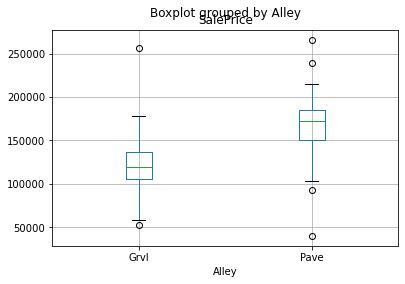

In [31]:
train.boxplot(column=['SalePrice'],by='Alley')

<AxesSubplot:ylabel='Frequency'>

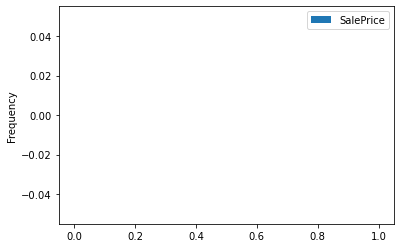

In [32]:
# NA값만 분포 확인
train[train['Alley']=='NA'].plot(y='SalePrice',kind='hist')

#### 결측치 확인

- Alley에 골목이 없는 경우 null 값이 들어가 있는데, 'NA'로 채워주기

In [33]:
null_check('Street'), null_check('Alley')

-- Street --
train : 0
test : 0
-- Alley --
train : 1369
test : 1352


(None, None)

In [34]:
train['Alley'].fillna('NA', inplace=True)
test['Alley'].fillna('NA', inplace=True)

In [35]:
null_check('Alley')

-- Alley --
train : 0
test : 0


#### 분류
- feature_onehot에 추가, 한꺼번에 one-hot encoding

In [36]:
feature_onehot.append('Street')
feature_onehot.append('Alley')

### LotShape

- General shape of property

#### 의견

- Reg -> IR3 순으로 1,2,3,4 으로 매핑

#### 데이터 확인

- Regular부터, IR의 숫자가 커질수록 안좋은거.
- 문자 그대로 의미는 그럴 것 같은데 평균은 3과 4가 뒤집어져있네 왜일까...
- 표본이 적어서 그런듯... 4가 10개밖에 없어서 평균이 왜곡됐나보당...
- 4는 지워야 하나?

In [37]:
val_count('LotShape')

----- LotShape -----
---- train ----
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
---- test ----
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64 



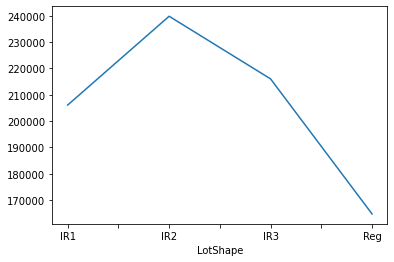

In [38]:
price_plot('LotShape')

<AxesSubplot:title={'center':'SalePrice'}, xlabel='LotShape'>

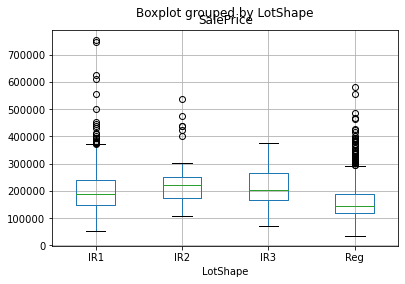

In [39]:
train.boxplot(column=['SalePrice'],by='LotShape')

#### 결측치 확인
- 없음

#### 매핑
- Reg -> IR3 을 1->4 순으로 매핑

In [40]:
map_LotShape = {'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}
train['LotShape'] = train['LotShape'].map(map_LotShape)
test['LotShape'] = test['LotShape'].map(map_LotShape)

In [41]:
val_count('LotShape')

----- LotShape -----
---- train ----
1    925
2    484
3     41
4     10
Name: LotShape, dtype: int64
---- test ----
1    934
2    484
3     35
4      6
Name: LotShape, dtype: int64 



#### 분류
- 순서대로 매핑해줬고, feature_map에 추가

In [42]:
feature_map.append('LotShape')

### LandContour

- Flatness of the property
- 경사도 : 얼마나 평평한지?

#### 의견

- 경사가 낮음 -> 높음 순으로 매핑
- Lv1 -> Low -> HLS -> Bnk 순으로 매핑
- <span class="mark">여기도 0이 너무 많은데..</span>
- 의외로 Hillside가 젤 높고 Bank가 제일 낮네. 데이터가 너무 적어서 왜곡이 있는 건지.. 아님 막 베버리 힐즈? 처럼 적당한 언덕이 부자동네인 건지... 우리나라에도 평창동? 이런데가 약간 산간 인데 고급주택가잖어.. 뭔가 도시를 내려다 볼 수 있어야 비싼 건가? 그렇지만 레알 절벽인 곳은 집값 최하인 거고?

#### 데이터 확인
- Lvl : 거의 평지 / Near Flat/Level 
- Bnk : 경사가 가장 심하다고 봐야하나? / Bank - Quick and Significant rise
- HLS : 경사가 꽤 있음 / Hillside - Significant slope
- Low : 경사가 낮음 / Depression

In [43]:
val_count('LandContour')

----- LandContour -----
---- train ----
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
---- test ----
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64 



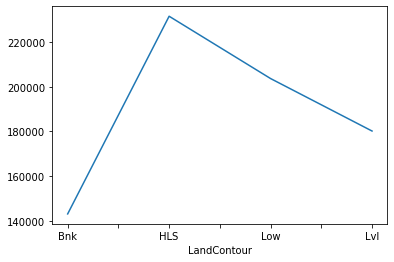

In [44]:
price_plot('LandContour')

#### 결측치 확인
- 없음

#### 매핑

In [45]:
map_LandContour = {'Lvl':1, 'Low':2, 'HLS':3, 'Bnk':4}
train['LandContour'] = train['LandContour'].map(map_LandContour)
test['LandContour'] = test['LandContour'].map(map_LandContour)

In [46]:
val_count('LandContour')

----- LandContour -----
---- train ----
1    1311
4      63
3      50
2      36
Name: LandContour, dtype: int64
---- test ----
1    1311
3      70
4      54
2      24
Name: LandContour, dtype: int64 



#### 분류
- 매핑했으므로 feature_map에 추가

In [47]:
feature_map.append('LandContour')

### Utilities

#### 의견

train set에서 1개 빼고 모두 AllPub이고  
test set에도 결측 2개 제외하고는 모두 AllPub.  
-> 제거해도 될지도?

- 동의. 1개는 의미 없는 듯.

#### 데이터 확인 / 결측치 확인

- AllPub : 다 있음
- NoSewr : 전기, 가스, 물
- NoSeWa : 전기, 가스
- ELO : 전기만 있음

In [48]:
val_count('Utilities')

----- Utilities -----
---- train ----
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
---- test ----
AllPub    1457
Name: Utilities, dtype: int64 



#### 분류
- 컬럼을 지워버릴거니까 feature_del에 추가.

In [49]:
feature_del.append('Utilities')

### !!! LotConfig

- Lot Configuration
- Lot(마당/마당+집?)의 구성

#### 의견

- 일단 one-hot encoding
- 그래프 그려보기?
- FR3는 표본이 너무 적은 거 같고. 나머지는 CulDSac말고는 다 비슷한듯?
- CulDSac과 그 외를 0과 1로만 구분하는 것은 어떨런지?

#### 데이터 확인
- 대부분 inside

In [50]:
val_count('LotConfig')

----- LotConfig -----
---- train ----
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
---- test ----
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64 



- 그래프 그려보기

In [51]:
avg_price('LotConfig')

FR2 : 177934.5744680851
CulDSac : 223854.6170212766
Corner : 181623.4258555133
Inside : 176938.0475285171
FR3 : 208475.0


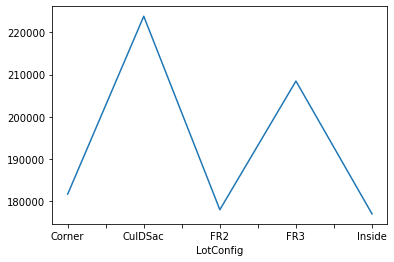

In [52]:
price_plot('LotConfig')

#### 결측치 확인
- 없음

#### 분류

- 추가적으로 고민해보는걸루

In [53]:
feature_onehot.append('LotConfig')

### LandSlope

- 경사도
- Gentle -> Moderate -> Severe

#### 의견

- 위에 LandContour랑 차이가 뭔지? / 합치거나 할 수 있을지?
- 일단 경사도 순으로 매핑
- 여기도 LandContour랑 비슷한 맥락이네. 경사도가 클수록 비싼듯? Sev가 13개 뿐이어서 엄청 유의미하진 않은 거 같지만.

#### 데이터 확인

- 대부분 다 젠틀하다고 나옴.

In [54]:
val_count('LandSlope')

----- LandSlope -----
---- train ----
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
---- test ----
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64 



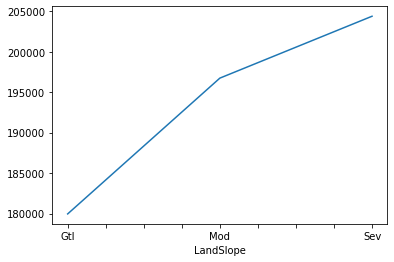

In [55]:
price_plot('LandSlope')

#### 결측치 확인
- 없음

In [56]:
null_check('LandSlope')

-- LandSlope --
train : 0
test : 0


#### 매핑
- Gtl -> Mod -> Sev 순으로

In [57]:
map_LandSlope = {'Gtl':1, 'Mod':2, 'Sev':3}
train['LandSlope'] = train['LandSlope'].map(map_LandSlope)
test['LandSlope'] = test['LandSlope'].map(map_LandSlope)

In [58]:
val_count('LandSlope')

----- LandSlope -----
---- train ----
1    1382
2      65
3      13
Name: LandSlope, dtype: int64
---- test ----
1    1396
2      60
3       3
Name: LandSlope, dtype: int64 



#### 분류

In [59]:
feature_map.append('LandSlope')

### !!! Neighborhood

- 도시 경계? 어디랑 인접해있는지?

#### 의견

- 모르겠다 근데 one-hot을 하기에도 종류가 너무 많은거 아닌가?
- 원핫 하기엔 너무 많긴 하다. 아예 그룹바이 평균 집값을 넣어버리는 건 해괴한 짓인가?

#### 데이터 확인

그래프 그려보기

In [60]:
val_count('Neighborhood')

----- Neighborhood -----
---- train ----
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
---- test ----
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
NPkVill     14
BrDale      14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64 



In [61]:
avg_price('Neighborhood')

OldTown : 128225.30088495575
Timber : 242247.44736842104
Blmngtn : 194870.88235294117
Edwards : 128219.7
BrkSide : 124834.05172413793
NAmes : 145847.08
SWISU : 142591.36
NWAmes : 189050.0684931507
MeadowV : 98576.4705882353
SawyerW : 186555.7966101695
Mitchel : 156270.1224489796
Gilbert : 192854.50632911394
StoneBr : 310499.0
IDOTRR : 100123.78378378379
NPkVill : 142694.44444444444
NoRidge : 335295.31707317074
ClearCr : 212565.42857142858
Veenker : 238772.72727272726
Crawfor : 210624.72549019608
CollgCr : 197965.77333333335
Sawyer : 136793.13513513515
Blueste : 137500.0
BrDale : 104493.75
Somerst : 225379.83720930232
NridgHt : 316270.6233766234


<AxesSubplot:xlabel='Neighborhood'>

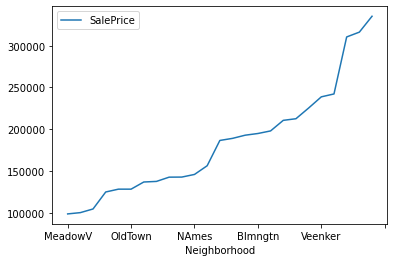

In [62]:
Nei=pd.DataFrame(train.groupby('Neighborhood').mean()['SalePrice']).sort_values(by=['SalePrice'])
Nei.plot()

#### 결측치 확인
- 없음

#### 분류
- 그냥 one-hot을 해버리기에 값들이 너무 다양한데, 고민해보기

In [63]:
feature_extra.append('Neighborhood')

### !!! Condition1/2

- Condition
- 그린벨트여부, 주변에 철도 여부 등등

#### 의견

- 1과 2를 합치는건 좋아 보이는데.
- 근데 단순 컨디션 갯수로 판단하는게 괜찮을까?
- one-hot을 해도 적합할까?
- 같은 값들로 이루어진 열들이라 원핫으로 처리해도 괜찮을듯.
- Condition1,2를 다 해도 값이 10개 미만인 RRNe, RRNn, PosA는 제거하고 원핫 돌리는 건 어떤지.
- 둘이 합쳐서 하되, Norm은 기본값인 거 같으니 0으로 처리하고 나머지 해당하는 값에 1 체크하면 될듯

#### 데이터 확인

- 대부분 노말임.

In [64]:
val_count('Condition1')

----- Condition1 -----
---- train ----
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
---- test ----
Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNn         4
RRNe         4
Name: Condition1, dtype: int64 



In [65]:
val_count('Condition2')

----- Condition2 -----
---- train ----
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64
---- test ----
Norm      1444
Feedr        7
Artery       3
PosA         3
PosN         2
Name: Condition2, dtype: int64 



- norm보다 싼거도 있네  
- 옵션이 있다고 무조건 좋은게 아닌가봄..  
- 그러면 컨디션 개수로 묶는건 진짜 아닌거같은뎅..
- Condition2의 데이터가 너무 적어서 왜곡이 생긴 걸 수도...
- Condition1으로 체크해보니 더 완곡해졌어

In [66]:
avg_price('Condition2')

RRAn : 136905.0
RRAe : 190000.0
Artery : 106500.0
PosA : 325000.0
RRNn : 96750.0
Norm : 181169.40553633217
PosN : 284875.0
Feedr : 121166.66666666667


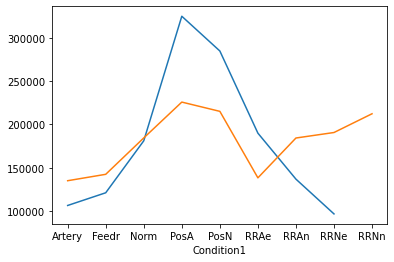

In [67]:
price_plot('Condition2')
price_plot('Condition1')
# 노란 선이 Condition1

In [68]:
# 컨디션 2가 Norm이 아닌데, 컨디션 1이 Norm인 경우는 없음.
train['Condition1'][train['Condition2']!='Norm']

9       Artery
29       Feedr
63        RRAn
88       Feedr
184       RRAn
523       PosN
531       RRNn
548      Feedr
583     Artery
589       RRAn
825       PosN
974       RRAn
1003     Feedr
1186    Artery
1230     Feedr
Name: Condition1, dtype: object

#### 결측치 확인
- 없음~

#### 분류

In [69]:
# feature_extra.append('Condition1')
# feature_extra.append('Condition2')
feature_onehot.append('Condition1')
feature_onehot.append('Condition2')

### BldgType

- 주거 형태 
- 1Fam : 독채
- 2FmCon : 독채에 두 가구 거주
- Duplx : Duplex(이중?)
- TwnhsE : Townhouse End unit
- Twnhs(I) : Townhouse Inside unit
    - 설명 문서엔 TwnhsI 였는데 실제 값은 Twnhs 가 들어가있음

#### 의견

- 2fmCon < Duplex <= Twnhs <<<< TwnhsE <= 1Fam
- 근데 순서가 약간 애매함. 생각했던거랑 실제 가격이랑
- 애매하니까 one-hot 가자
- 동의

#### 데이터 확인

In [70]:
val_count('BldgType')

----- BldgType -----
---- train ----
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
---- test ----
1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64 



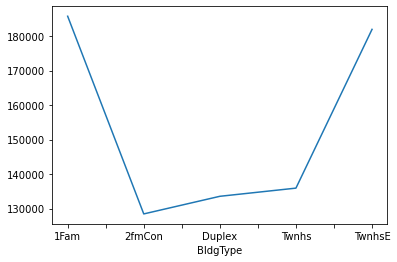

In [71]:
price_plot('BldgType')

#### 결측치 확인
- 없다!

#### 분류

In [72]:
feature_onehot.append('BldgType')

### HouseStyle

- 주거 스타일

#### 의견

- one-hot 하자
- 동의

#### 데이터 확인

In [73]:
val_count('HouseStyle')

----- HouseStyle -----
---- train ----
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
---- test ----
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64 



In [74]:
avg_price('HouseStyle')

2.5Fin : 220000.0
2Story : 210051.76404494382
1.5Fin : 143116.74025974027
SFoyer : 135074.48648648648
SLvl : 166703.38461538462
1.5Unf : 110150.0
2.5Unf : 157354.54545454544
1Story : 175985.4779614325


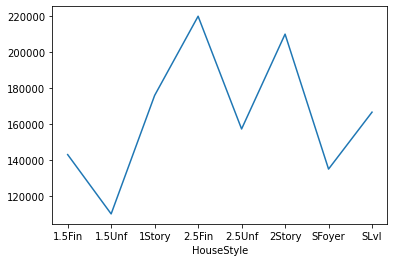

In [75]:
price_plot('HouseStyle')

#### 결측치 확인
- 없음!

#### 분류

In [76]:
feature_onehot.append('HouseStyle')

### OverallQual / OverallCond

- 전체적인 퀄리티, 컨디션을 평가한 지표

#### 의견

- 그냥 숫자라서 그대로 넣으면 될 듯하긴 함
- 상관계수가 엄청 높음.
- 퀄리티는 상관계수가 높은데 컨디션은 상관계수가 낮음
- 컨디션은 5일때 집값 평균이 젤 높은듯?

#### 데이터 확인

In [77]:
val_count('OverallQual'), val_count('OverallCond')

----- OverallQual -----
---- train ----
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
---- test ----
5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64 

----- OverallCond -----
---- train ----
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
---- test ----
5    824
6    279
7    185
8     72
4     44
3     25
9     19
1      6
2      5
Name: OverallCond, dtype: int64 



(None, None)

In [78]:
price_cor('OverallQual')

0.791


0.791

In [79]:
price_cor('OverallCond')

-0.078


-0.078

<AxesSubplot:title={'center':'SalePrice'}, xlabel='OverallCond'>

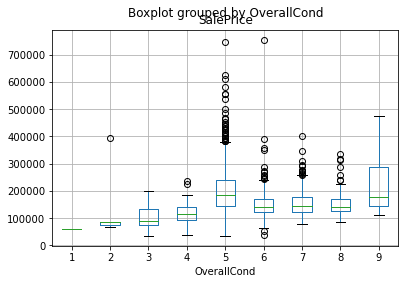

In [80]:
train.boxplot(column='SalePrice', by='OverallCond')

#### 결측치 확인
- 없음!

#### 분류
- discrete한 값이니까

In [81]:
feature_dis.append('OverallQual')
feature_dis.append('OverallCond')

### YearBuilt / YearRemodAdd

- 지어진 년도 / 리모델링한 년도

#### 의견

- 같은 년도에 공사를 했어도, 새 건물이 리모델링한 건물보다 좋겠지?
- 일단 각각 넣고 두 feature를 합칠 방법이 있을지?
- normalize : 1872를 빼주자
- 산점도를 보면 양의 상관관계가 있어보임
- 상관관계 둘다 0.5가 넘네
- YearRemodAdd에도 왜 똑같이 1872를 빼준 거얌??
- YearRemodAdd과 집값의 산점도를 보면 YearRemodAdd의 최솟값에 데이터가 몰려있음... 1950년 이전이면 다 1950으로 들어간듯 이거 어떻게 처리하지?

#### 데이터 확인

In [82]:
# 가장 오래전에 지어진 건물의 년도 출력
min(val_list(train, 'YearBuilt')[0], val_list(test, 'YearBuilt')[0])

1872

In [83]:
min(train['YearRemodAdd'])

1950

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

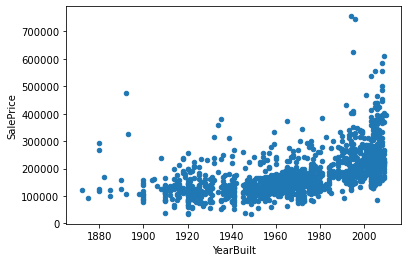

In [84]:
train.plot(x='YearBuilt',y='SalePrice', kind='scatter')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

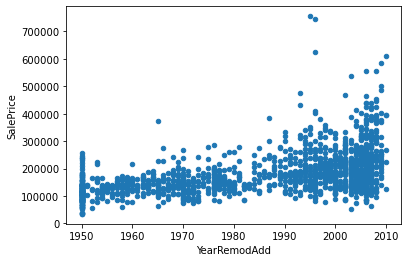

In [85]:
train.plot(x='YearRemodAdd',y='SalePrice', kind='scatter')

In [86]:
price_cor('YearRemodAdd')

0.507


0.507

In [87]:
price_cor('YearBuilt')

0.523


0.523

#### 결측치 확인
- 없음!

#### Normalize

- 가장 오래된 년도인 1872년 빼주자

In [88]:
train['YearBuilt'] -= 1872
test['YearBuilt'] -= 1872
train['YearRemodAdd'] -= 1872
test['YearRemodAdd'] -= 1872

In [89]:
train['YearBuilt'].head()

0    131
1    104
2    129
3     43
4    128
Name: YearBuilt, dtype: int64

#### 분류
- discrete

In [90]:
feature_dis.append('YearBuilt')
feature_dis.append('YearRemodAdd')

### RoofStyle / RoofMatl

- 지붕 스타일, 재질

#### 의견

- one-hot.
- 근데 특정 값만 엄청 많은데 one-hot을 하면 0에 가까운 열들이 생기는 문제?
- 너무 적은 값들은 제거해도 될듯!
- RoofMatl은 아예 feature를 제거해도 될듯!
- 그래프 그려보기ㅣ

#### 데이터 확인

거의 다 Gable / CompShg 임.

In [91]:
val_count('RoofStyle'), val_count('RoofMatl')

----- RoofStyle -----
---- train ----
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
---- test ----
Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
Name: RoofStyle, dtype: int64 

----- RoofMatl -----
---- train ----
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64
---- test ----
CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64 



(None, None)

#### 결측치 확인
- 없음!

#### 분류

In [92]:
feature_onehot.append('RoofStyle')
# feature_onehot.append('RoofMatl')
feature_del.append('RoofMatl')

### Exterior1st / Exterior2nd

- 집 외부를 뭐로 덮고 있는지?

#### 의견

- one-hot으로 보내고 싶긴한데
- 값이 1개인 친구들도 one-hot을 하는게 맞나?
- 값이 1개인 친구들은 제거해도 될듯
- 이게 feature 목록이 train과 test가 일치해야하니까... 값이 적은 것들은 제거하는 게 전처리 속도도 많이 개선시킬듯
- 그리고 이거도 합칠 수 있을듯.
- conditioni1/2랑 다르게 얘네는 독립?인 거 같어 1st하고 2nd가 포함관계에 있지 않음. VinySd를 체크해보니 1st하고 2nd 둘다 VinySd인 집은 502개임 2개는 2nd만 VinySd이고 13개는 1st만 VinySd임

#### 데이터 확인

In [93]:
val_count('Exterior1st'), val_count('Exterior2nd')

----- Exterior1st -----
---- train ----
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64
---- test ----
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64 

----- Exterior2nd -----
---- train ----
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
---- test ----
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      

(None, None)

In [94]:
train[train['Exterior1st']=='VinylSd'].loc[train['Exterior2nd']=='VinylSd']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,Pave,NA,1,1,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,1,68.0,11250,Pave,NA,2,1,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,1,84.0,14260,Pave,NA,2,1,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,1,85.0,14115,Pave,NA,2,1,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,1,75.0,10084,Pave,NA,1,1,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,90,1,60.0,9000,Pave,NA,1,1,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1452,1453,180,2,35.0,3675,Pave,NA,1,1,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,1,90.0,17217,Pave,NA,1,1,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,5,62.0,7500,Pave,Pave,1,1,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000


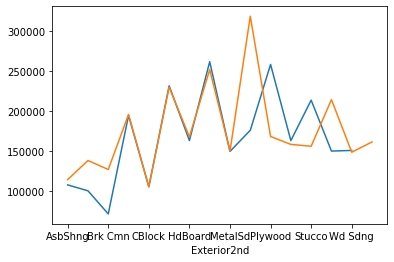

In [95]:
price_plot('Exterior1st')
price_plot('Exterior2nd')
# 노란색이 2nd

#### 결측치 확인
- test set에 한개씩. 가장 많은 값으로 채우기.

In [96]:
null_check('Exterior1st'), null_check('Exterior2nd')

-- Exterior1st --
train : 0
test : 1
-- Exterior2nd --
train : 0
test : 1


(None, None)

In [97]:
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)

#### 분류

In [98]:
feature_extra.append('Exterior1st')
feature_extra.append('Exterior2nd')

### MasVnrType

- 벽돌 베니어 벽의 타입..?

#### 의견

- one-hot
- None을 제외하고 3개의 값으로 원핫 하면 되지 않나? 어차피 구분이 되니까 근데 그렇게 생각하니 그럼 모든 원핫은 값을 1개 빼고 해도 되는 거 아닌가 싶은 생각도 드네.. 그렇게 하면 성별은 걍 남0여1 이런 식으로 처리하는 것과 같은데.. 걍 None도 넣고 하는 게 더 결과가 좋으려나

#### 데이터 확인

In [99]:
val_count('MasVnrType')

----- MasVnrType -----
---- train ----
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
---- test ----
None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64 



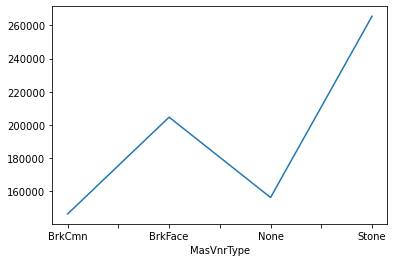

In [100]:
price_plot('MasVnrType')

#### 결측치 확인
- 결측이 좀 있는데 일단 최빈값으로 채우기.

In [101]:
null_check('MasVnrType')

-- MasVnrType --
train : 8
test : 16


In [102]:
train['MasVnrType'].fillna('None', inplace=True)
test['MasVnrType'].fillna('None', inplace=True)

In [103]:
null_check('MasVnrType')

-- MasVnrType --
train : 0
test : 0


#### 분류

In [104]:
feature_onehot.append('MasVnrType')

### MasVnrArea

- 베니어 벽의 넓이?
- 0만 어떻게 처리하면 될듯
- 상관관계도 큰 편

#### 의견

- 넓이 값. 그대로 넣고 normalize 고민
- 대부분 0임. 위에 타입이 None이 가장 많아서 그런듯

#### 데이터 확인

In [105]:
val_count('MasVnrArea')

----- MasVnrArea -----
---- train ----
0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64
---- test ----
0.0       877
176.0      10
144.0       9
120.0       8
216.0       8
         ... 
166.0       1
292.0       1
113.0       1
39.0        1
1159.0      1
Name: MasVnrArea, Length: 303, dtype: int64 



<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

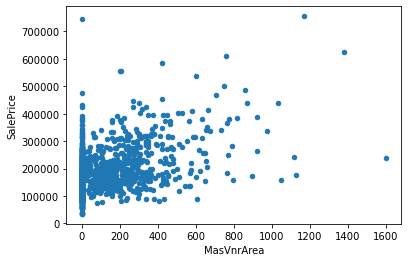

In [106]:
train.plot(x='MasVnrArea',y='SalePrice',kind='scatter')

In [107]:
price_cor('MasVnrArea')

0.477


0.477

#### 결측치 확인
- 결측값은 0으로

In [108]:
null_check('MasVnrArea')

-- MasVnrArea --
train : 8
test : 15


In [109]:
train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

#### 분류

In [110]:
feature_raw.append('MasVnrArea')

### ExterQual / ExterCond

- 

#### 의견

- 대부분 TA(Typical/Average)
- 그래도 순서가 있는거니까 숫자로 매핑해봄.
- ExterQual은 예상대로인데 아까처럼 컨디션은 순서대로가 아니네.. 5번이 낮게 나오면 값이 3개밖에 없어서 그런갑다 할텐데 4번은 그렇지도 않은데...
- 상관계수도 아까처럼 퀄리티는 높은데 컨디션은 무시해도 되는 수준.

#### 데이터 확인

In [111]:
#val_count('ExterQual')
val_count('ExterCond')

----- ExterCond -----
---- train ----
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
---- test ----
TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64 



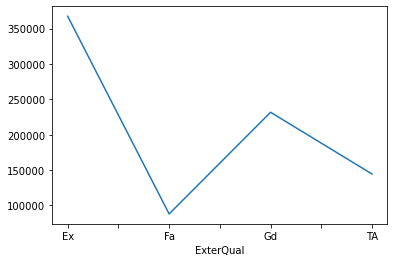

In [112]:
price_plot('ExterQual')

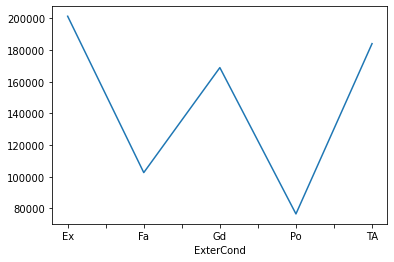

In [113]:
price_plot('ExterCond')

#### 결측치 확인
- 없음!

#### 매핑
- Po, Fa, TA, Gd, Ex 순으로 1~5까지 매핑

In [114]:
#ddaasdsa
map_Exter = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
train['ExterQual'] = train['ExterQual'].map(map_Exter)
test['ExterQual'] = test['ExterQual'].map(map_Exter)
train['ExterCond'] = train['ExterCond'].map(map_Exter)
test['ExterCond'] = test['ExterCond'].map(map_Exter)

In [115]:
price_cor('ExterCond')

0.019


0.019

In [116]:
price_cor('ExterQual')

0.683


0.683

#### 분류

In [117]:
feature_map.append('ExterQual')
feature_map.append('ExterCond')

### Foundation

- 대문 종류

#### 의견

- one-hot / 3번밖에 안나오는 값에 대한 고민? 제거
- 원핫 하면 될듯

#### 데이터 확인

In [118]:
val_count('Foundation')

----- Foundation -----
---- train ----
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
---- test ----
PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64 



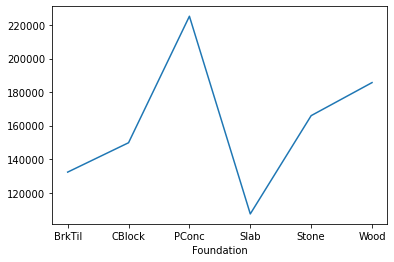

In [119]:
price_plot('Foundation')

#### 결측치 확인
- 없음!

#### 분류

In [120]:
feature_onehot.append('Foundation')

### BsmtQual / BsmtCond

- 

#### 의견

- Po -> EX 순이긴 한데. No basement는?
- No basement 는 0으로 해서 매핑해보기.
- 여기는 앞의 퀄리티/컨디션 조합들과 다르게 컨디션이 유의미한 편

#### 데이터 확인

In [121]:
val_count('BsmtQual')

----- BsmtQual -----
---- train ----
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
---- test ----
TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64 



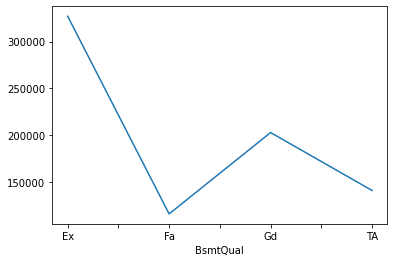

In [122]:
price_plot('BsmtQual')

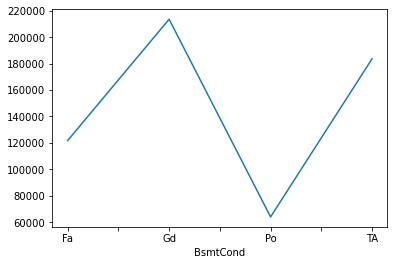

In [123]:
price_plot('BsmtCond')

#### 결측치 확인
- NA로 채워주긴 할건데, Basement가 없어서가 아니라 진짜 결측인 애들이 몇개 있음(2~3개)
- 일단 NA로 채우기

In [124]:
null_check('BsmtQual'), null_check('BsmtCond')

-- BsmtQual --
train : 37
test : 44
-- BsmtCond --
train : 37
test : 45


(None, None)

In [125]:
train['BsmtQual'].fillna('NA', inplace=True)
test['BsmtQual'].fillna('NA', inplace=True)
train['BsmtCond'].fillna('NA', inplace=True)
test['BsmtCond'].fillna('NA', inplace=True)

#### 매핑
- NA(0), Po(1), Fa(2), TA(3), Gd(4), Ex(5)

In [126]:
map_Bsmt = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
train['BsmtQual'] = train['BsmtQual'].map(map_Bsmt)
test['BsmtQual'] = test['BsmtQual'].map(map_Bsmt)
train['BsmtCond'] = train['BsmtCond'].map(map_Bsmt)
test['BsmtCond'] = test['BsmtCond'].map(map_Bsmt)

In [127]:
price_cor('BsmtQual')

0.585


0.585

In [128]:
price_cor('BsmtCond')

0.213


0.213

#### 분류

In [129]:
feature_map.append('BsmtQual')
feature_map.append('BsmtCond')

### BsmtExposure

- 

#### 의견

- No basement가 결측치로 처리되어 있어서 'NA'로 바꿔준 다음 one-hot encoding
- 얘네도 뚜렷하게 순서가 있는 거 같기도 한데! 지하실이 없으면 젤 싸고 있는 애들 중에 햇빛이 잘 들수록 비싸지는뎅! 그렇게 01234해서 상관계수 계산하면 0.5 나오긴 하넹!
- 매핑하고 나서 선그래프도 너무너무 직선인뎅??? 뭐야 오류인가

#### 데이터 확인

In [130]:
val_count('BsmtExposure')

----- BsmtExposure -----
---- train ----
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
---- test ----
No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64 



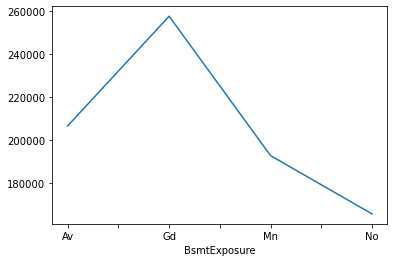

In [131]:
price_plot('BsmtExposure')

#### 결측치 확인
- basement가 없는 경우 결측으로 처리되어 있어서, 'NA' 넣어주기

In [132]:
train['BsmtExposure'].fillna('NA', inplace=True)
test['BsmtExposure'].fillna('NA', inplace=True)

#### 매핑

In [133]:
map_Expo = {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
train['BsmtExposure'] = train['BsmtExposure'].map(map_Bsmt)
test['BsmtExposure'] = test['BsmtExposure'].map(map_Bsmt)

In [134]:
price_cor('BsmtExposure')

0.507


0.507

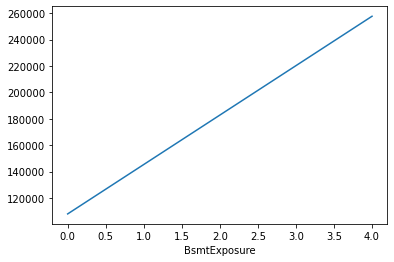

In [135]:
price_plot('BsmtExposure')

#### 분류
- one-hot

In [136]:
# feature_onehot.append('BsmtExposure')
feature_map.append('BsmtExposure')

### BsmtFinType / SF

- basement type1, type2, Unfinished를 합치면 총 면적.

In [137]:
# 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'

#### 의견

- No basement가 많은데.. 
- type1, type2, unf 를 각각 쓸지 / Total로 합쳐서 쓸지?
- total 쓰면 될듯! 상관계수도 높고 각자 쓰자니 0을 처리하기도 어렵고 type2는 상관계수가 거의 0인데 그것만 없애는 것도 그렇고...
- type2의 종류도 보니까 Unf가 1256개나 되네. 그래서 넓이도 0이 많은갑다
- type1,2의 종류도 Exterior 1st,2nd 처리방법과 같게 하면 될듯 어케 해야할지는 아직 모르겠지만..

#### 데이터 확인

In [138]:
val_count('BsmtFinType2')

----- BsmtFinType2 -----
---- train ----
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
---- test ----
Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64 



In [139]:
train.loc[:,'BsmtFinType1':'TotalBsmtSF']

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,GLQ,706,Unf,0,150,856
1,ALQ,978,Unf,0,284,1262
2,GLQ,486,Unf,0,434,920
3,ALQ,216,Unf,0,540,756
4,GLQ,655,Unf,0,490,1145
...,...,...,...,...,...,...
1455,Unf,0,Unf,0,953,953
1456,ALQ,790,Rec,163,589,1542
1457,GLQ,275,Unf,0,877,1152
1458,GLQ,49,Rec,1029,0,1078


0.386
-0.011
0.214
0.614


0.614

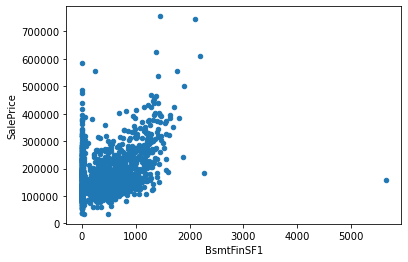

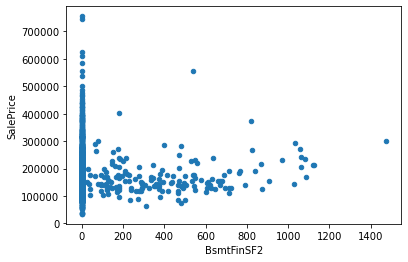

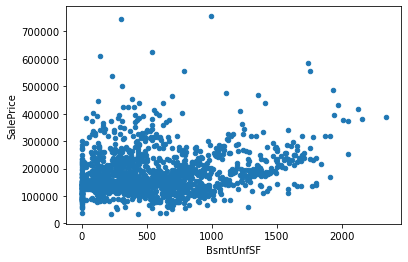

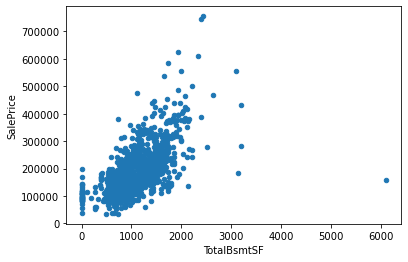

In [140]:
train.plot(x='BsmtFinSF1',y='SalePrice',kind='scatter')
train.plot(x='BsmtFinSF2',y='SalePrice',kind='scatter')
train.plot(x='BsmtUnfSF',y='SalePrice',kind='scatter')
train.plot(x='TotalBsmtSF',y='SalePrice',kind='scatter')
price_cor('BsmtFinSF1')
price_cor('BsmtFinSF2')
price_cor('BsmtUnfSF')
price_cor('TotalBsmtSF')

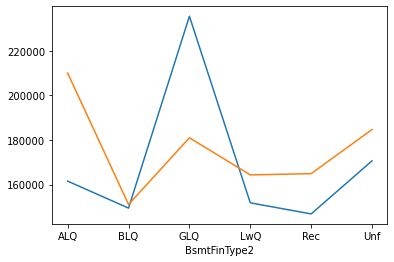

In [141]:
price_plot('BsmtFinType1')
price_plot('BsmtFinType2')
# 노란색이 타입2

#### 결측치 확인

In [142]:
null_check('BsmtFinType1')

-- BsmtFinType1 --
train : 37
test : 42


#### 분류

In [143]:
for bsmt in ['BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    feature_extra.append(bsmt)

### Heating / HeatingQC

- 난방의 종류와 퀄리티

#### 의견

- 난방의 종류가 무엇이든 QC에 포함이 되는게 아닌지..?
- 난방 종류는 one-hot, QC는 점수로 매핑
- QC 매핑은 좋은 거 같음.
- 종류는 1428개가 GasA라서 굳이 원핫 할 만큼 좋은 feature는 아닌듯? 제거 제안

#### 데이터 확인

In [144]:
train['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

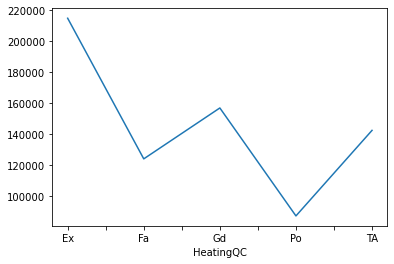

In [145]:
price_plot('HeatingQC')

In [146]:
train['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

#### 결측치 확인

In [147]:
null_check('Heating'), null_check('HeatingQC')

-- Heating --
train : 0
test : 0
-- HeatingQC --
train : 0
test : 0


(None, None)

#### 매핑

In [148]:
map_heat = {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
train['HeatingQC'] = train['HeatingQC'].map(map_heat)
test['HeatingQC'] = test['HeatingQC'].map(map_heat)

#### 분류

In [149]:
# feature_onehot.append('Heating')
feature_del.append('Heating')
feature_map.append('HeatingQC')

### CentralAir / Electrical

- 

#### 의견

- CentralAir는 Y/N을 1/0으로 매핑
- 동의
- Electrical은 one-hot
- FuseP랑 mix는 제거해도?

#### 데이터 확인

In [150]:
val_count('Electrical')

----- Electrical -----
---- train ----
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
---- test ----
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64 



In [151]:
val_count('CentralAir')

----- CentralAir -----
---- train ----
Y    1365
N      95
Name: CentralAir, dtype: int64
---- test ----
Y    1358
N     101
Name: CentralAir, dtype: int64 



#### 결측치 확인
- 최빈값인 'SBrkr'로 결측치 채움

In [152]:
null_check('CentralAir'), null_check('Electrical')

-- CentralAir --
train : 0
test : 0
-- Electrical --
train : 1
test : 0


(None, None)

In [153]:
train['Electrical'].fillna('SBrkr', inplace=True)

#### 매핑
- CentralAir의 Y/N을 1/0으로

In [154]:
map_CA = {'N':0, 'Y':1}
train['CentralAir'] = train['CentralAir'].map(map_CA)
test['CentralAir'] = test['CentralAir'].map(map_CA)

#### 분류

In [155]:
feature_map.append('CentralAir')
feature_onehot.append('Electrical')

### Floor

- 1stFlrSF / 2ndFlrSF : 1층/2층 Floor의 면적
- 2ndFlrSF는 0인 값이 많긴 한데, 1층집이라는 얘긴데, 분포를  2층집이라고 해서 1층집보다 많이 비싸도 않네. 2층 넓이 0인 행과 아닌 행 1로 해서 집값 박스플랏 그려봄. 큰차이는 없는듯 1,2층면적을 더해도 괜찮나?
- 상관계수는 각각
> - 1stFlrSF	0.605852
> - 2ndFlrSF	0.319334
> - sum	0.716883
> - 더해서 처리해도 되려나.
- LowQualFinSF : 모든 층 통츨어서 마감이 잘 안된 부분?의 면적
- LowQualFinSF은 numeric인데 0이 1434개나 되서 무의미한듯? 걍 제거해도 될듯


<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

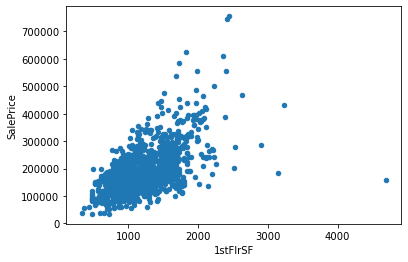

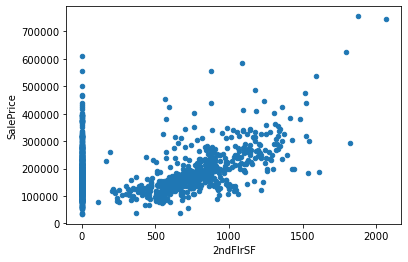

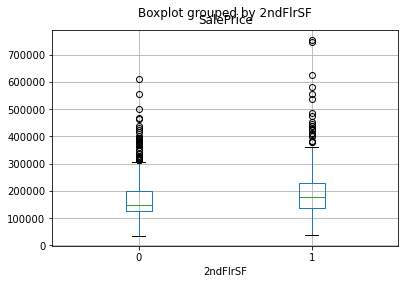

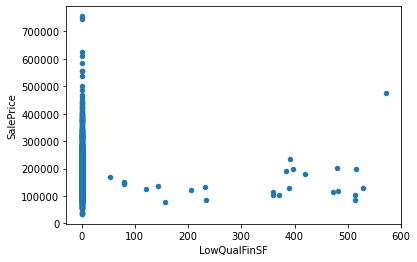

In [156]:
train.plot(x='1stFlrSF',y='SalePrice',kind='scatter')
train.plot(x='2ndFlrSF',y='SalePrice',kind='scatter')
SF=pd.read_csv('data/train.csv')
SF.loc[SF['2ndFlrSF']!=0,['2ndFlrSF']]=1
SF.boxplot(column='SalePrice',by='2ndFlrSF')
train.plot(x='LowQualFinSF',y='SalePrice',kind='scatter')

In [157]:
SF=pd.read_csv('data/train.csv')
SF['sum']=SF['1stFlrSF']+SF['2ndFlrSF']
pd.DataFrame(SF.corr()['SalePrice']).loc[['1stFlrSF','2ndFlrSF','sum']]

,SalePrice
1stFlrSF,0.605852
2ndFlrSF,0.319334
sum,0.716883


In [158]:
val_count('LowQualFinSF')

----- LowQualFinSF -----
---- train ----
0      1434
80        3
360       2
392       1
528       1
515       1
514       1
513       1
481       1
479       1
473       1
420       1
397       1
390       1
53        1
384       1
371       1
234       1
232       1
205       1
156       1
144       1
120       1
572       1
Name: LowQualFinSF, dtype: int64
---- test ----
0       1445
80         1
108        1
114        1
140        1
205        1
259        1
312        1
362        1
431        1
436        1
450        1
512        1
697        1
1064       1
Name: LowQualFinSF, dtype: int64 



#### 의견

- 면적데이터라서 normailze하고 그냥 넣으면 될 것 같음.
- 1층과 2층을 합쳐버리는건?

#### 결측치 확인
- 없음!

#### 분류

In [159]:
# for floor in ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF']:
#    feature_raw.append(floor)
for floor in ['1stFlrSF', '2ndFlrSF']:
    feature_raw.append(floor)
feature_del.append('LowQualFinSF')

### GrLivArea

- 지상 주거 공간의 넓이

#### 의견

- 그냥 넣어주면 될 듯?
- 동의

#### 데이터 확인

In [160]:
train['GrLivArea'].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

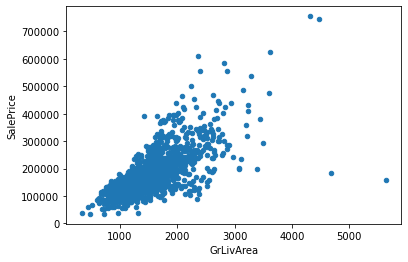

In [161]:
train.plot(x='GrLivArea',y='SalePrice',kind='scatter')

In [162]:
price_cor('GrLivArea')

0.709


0.709

#### 결측치 확인
- 없음!

#### 분류

In [163]:
feature_raw.append('GrLivArea')

### Bathroom

- 화장실의 개수

#### 의견

- 그래프 그려볼 필요.
- 일단 discrete에 다 넣어놓기
- 값의 count가 한자릿수인 값들은 빼도 될듯?
- 상관계수
> - BsmtFullBath 0.227
> - BsmtHalfBath -0.017
> - FullBath 0.561
> - HalfBath 0.284
- 상관계수가 낮지 않긴 한데, 급 의문이 discrete 데이터와 상관계수를 구하는 게 유의미한가? 위에서도 discrete 데이터에 상관계수 많이 구해봤던 거 같은데 ㅠㅠㅠ 생각해봐야할듯... 낼 해야지... 

#### 데이터 확인

In [164]:
val_count('BsmtFullBath')
val_count('BsmtHalfBath')
val_count('FullBath')
val_count('HalfBath')

----- BsmtFullBath -----
---- train ----
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
---- test ----
0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64 

----- BsmtHalfBath -----
---- train ----
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
---- test ----
0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64 

----- FullBath -----
---- train ----
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
---- test ----
2    762
1    659
3     31
4      4
0      3
Name: FullBath, dtype: int64 

----- HalfBath -----
---- train ----
0    913
1    535
2     12
Name: HalfBath, dtype: int64
---- test ----
0    921
1    525
2     13
Name: HalfBath, dtype: int64 



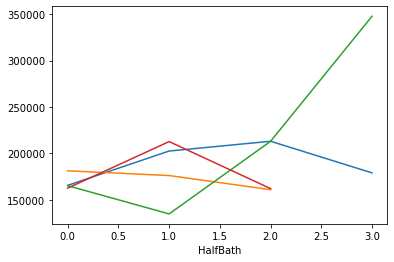

In [165]:
price_plot('BsmtFullBath') #파랑
price_plot('BsmtHalfBath') #노랑
price_plot('FullBath') #빨강
price_plot('HalfBath') #초록

In [166]:
price_cor('BsmtFullBath')
price_cor('BsmtHalfBath')
price_cor('FullBath')
price_cor('HalfBath')

0.227
-0.017
0.561
0.284


0.284

#### 결측치 확인
- test set의 BsmtFullBath, BsmtHalfBath에 각각 결측 2개씩
- 최빈값 0으로 채움

In [167]:
#null_check('BsmtFullBath'), null_check('BsmtHalfBath'), null_check('FullBath'), null_check('HalfBath')
test['BsmtFullBath'].fillna(0, inplace=True)
test['BsmtHalfBath'].fillna(0, inplace=True)

#### 분류

In [168]:
for bath in ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']:
    feature_dis.append(bath)

### Bedroom, Kitchen, TotalRooms

- 침실, 주방의 개수 및 총 방의 개수

#### 의견

- 일단 다 discrete feature로 분류
- 근데 전체 방 개수에 침실/주방 개수가 포함되는데?
- KitchenQual 은 0->4로 매핑

#### 데이터 확인

In [169]:
#train['TotRmsAbvGrd']-train['BedroomAbvGr']
#train['KitchenAbvGr'].value_counts()
val_count('KitchenQual')

----- KitchenQual -----
---- train ----
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
---- test ----
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64 



#### 결측치 확인
- test-set KitchenQual에 결측 하나.
- 최빈값이자 중앙값인 TA로 처리

In [170]:
for room in ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual']:
    null_check(room)
test['KitchenQual'].fillna('TA', inplace=True)

-- BedroomAbvGr --
train : 0
test : 0
-- KitchenAbvGr --
train : 0
test : 0
-- TotRmsAbvGrd --
train : 0
test : 0
-- KitchenQual --
train : 0
test : 1


#### 매핑
- 주방 퀄리티를 숫자로

In [171]:
map_qual = {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
train['KitchenQual'] = train['KitchenQual'].map(map_qual)
test['KitchenQual'] = test['KitchenQual'].map(map_qual)

#### 분류

In [172]:
for room in ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']:
    feature_dis.append(room)
feature_map.append('KitchenQual')

### Functional

- 

#### 의견

- one-hot? / extra에 넣어놓고 그래프 그려보기

#### 데이터 확인

In [173]:
#val_count('Functional')

#### 결측치 확인
- 최빈값으로 결측치 채워줌

In [174]:
test['Functional'].fillna('Typ', inplace=True)
null_check('Functional')

-- Functional --
train : 0
test : 0


#### 분류

In [175]:
feature_extra.append('Functional')

### Fireplaces / Qu

- 벽난로의 개수 및 퀄리티

#### 의견

- 벽난로의 개수는 discrete로.
- Quality는 매핑

#### 데이터 확인

In [176]:
val_count('Fireplaces')

----- Fireplaces -----
---- train ----
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
---- test ----
0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64 



#### 결측치 확인
- fireplace가 없는 경우 'NA'로 채워주기

In [177]:
train['FireplaceQu'].fillna('NA', inplace=True)
test['FireplaceQu'].fillna('NA', inplace=True)
null_check('FireplaceQu')

-- FireplaceQu --
train : 0
test : 0


#### 매핑

In [178]:
map_qual = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
train['FireplaceQu'] = train['FireplaceQu'].map(map_qual)
test['FireplaceQu'] = test['FireplaceQu'].map(map_qual)

#### 분류

In [179]:
feature_dis.append('Fireplaces')
feature_map.append('FireplaceQu')

### Garage

- 차고에 관한 항목들

In [180]:
Garage = ['GarageType', 'GarageYrBlt', 'GarageFinish',
'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']

#### 의견

- one-hot : Type, PavedDrive
- discrete : YrBlt, Cars
- mapping : Finish, Qual, Cond
- raw : Area

#### 데이터 확인

In [181]:
#val_count('GarageCars')

#### 결측치 확인
- Type, YrBlt, Finish, Qual, Cond에 차고가 없는 경우 결측이 들어가있음.
- 'NA' 혹은 0으로 데이터 형태에 맞게 채워주기
- Cars/Area의 결측 하나는 0으로

In [182]:
for feat in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[feat].fillna('NA', inplace=True)
    test[feat].fillna('NA', inplace=True)
for feat in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    train[feat].fillna(0, inplace=True)
    test[feat].fillna(0, inplace=True)

#### 매핑
- Finish 는 NA, Unf, Rfn, Fin 순으로
- Qual, Cond 는 하던대로

In [183]:
map_fin = {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}
map_qual = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
for dataset in [train, test]:
    dataset['GarageFinish'] = dataset['GarageFinish'].map(map_fin)
    for feat in ['GarageQual', 'GarageCond']:
        dataset[feat] = dataset[feat].map(map_qual)

#### 분류

In [184]:
feature_onehot.extend(['GarageType', 'PavedDrive'])
feature_dis.extend(['GarageYrBlt', 'GarageCars'])
feature_map.extend(['GarageFinish', 'GarageQual', 'GarageCond'])
feature_raw.append('GarageArea')

### Extra Areas

- 실외 부가적인 공간들의 넓이(Deck, Porch)

In [185]:
ex_area = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

#### 의견

- 전부 면적 값이므로 그대로 넣기 / normalize 고민

#### 결측치 확인
- 없음!

#### 분류

In [186]:
feature_raw.extend(ex_area)

### Pool, Fence, Misc

- 수영장, 펜스, 그 외 추가적인 feature들

#### 의견

- PoolArea랑 QC를 동시에 반영? (곱한다거나)
- 일단 Area는 면적이니까 raw / PoolQC, Fence는 mapping
- MiscFeature의 종류가 중요할까? 가격이 있으니까 지우는걸로..

#### 데이터 확인

In [187]:
val_count('MiscFeature')

----- MiscFeature -----
---- train ----
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
---- test ----
Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64 



#### 결측치 확인
- Pool, Fence가 없는경우 'NA'로 바꿔주기

In [188]:
for dataset in [train, test]:
    for feat in ['PoolQC', 'Fence']:
        dataset[feat].fillna('NA', inplace=True)

#### 매핑

In [189]:
map_qual = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
map_fence = {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}
for dataset in [train, test]:
    dataset['PoolQC'] = dataset['PoolQC'].map(map_qual)
    dataset['Fence'] = dataset['Fence'].map(map_fence)    

#### 분류

In [190]:
feature_raw.extend(['PoolArea', 'MiscVal'])
feature_map.extend(['PoolQC', 'Fence'])
feature_del.append('MiscFeature')

### MoSold / YrSold

- 팔린 월/년도

#### 의견

- discrete
- 년도 normalize / 둘을 합쳐야할지 각각 반영해야 할지?

#### 데이터 확인

In [191]:
val_count('YrSold')

----- YrSold -----
---- train ----
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
---- test ----
2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64 



#### 결측치 확인
- 없음!

#### 분류

In [192]:
feature_dis.extend(['MoSold', 'YrSold'])

### Sale Type / Condition

- 거래 타입 / 조건

#### 의견

- 순서가 있어보이지만, 애매한 부분이 있어서 일단 onehot 하기로
- 이거도 그래프 꼭 그려보기

#### 데이터 확인

In [193]:
val_count('SaleType')

----- SaleType -----
---- train ----
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
---- test ----
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64 



#### 결측치 확인
- test의 SaleType에 결측 한개 -> 최빈값 WD로 채우기

In [194]:
test['SaleType'].fillna('WD', inplace=True)

#### 분류

In [195]:
feature_onehot.extend(['SaleType', 'SaleCondition'])

## 저장

In [196]:
train.to_csv('data/train_pre1.csv')
test.to_csv('data/test_pre1.csv')

In [197]:
feature_dict = {'raw':feature_raw, 'dis':feature_dis, 
               'map':feature_map, 'onehot':feature_onehot,
                'extra':feature_extra, 'def':feature_del
               }

In [198]:
#features = pd.DataFrame(feature_dict)
features = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in feature_dict.items() ]))
features.to_csv('data/feature_classification.csv')